In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

circuitos=pd.read_excel('dataset_pfinal_ANS_V2.xlsx')
circuitos.set_index(['Id'],inplace=True)

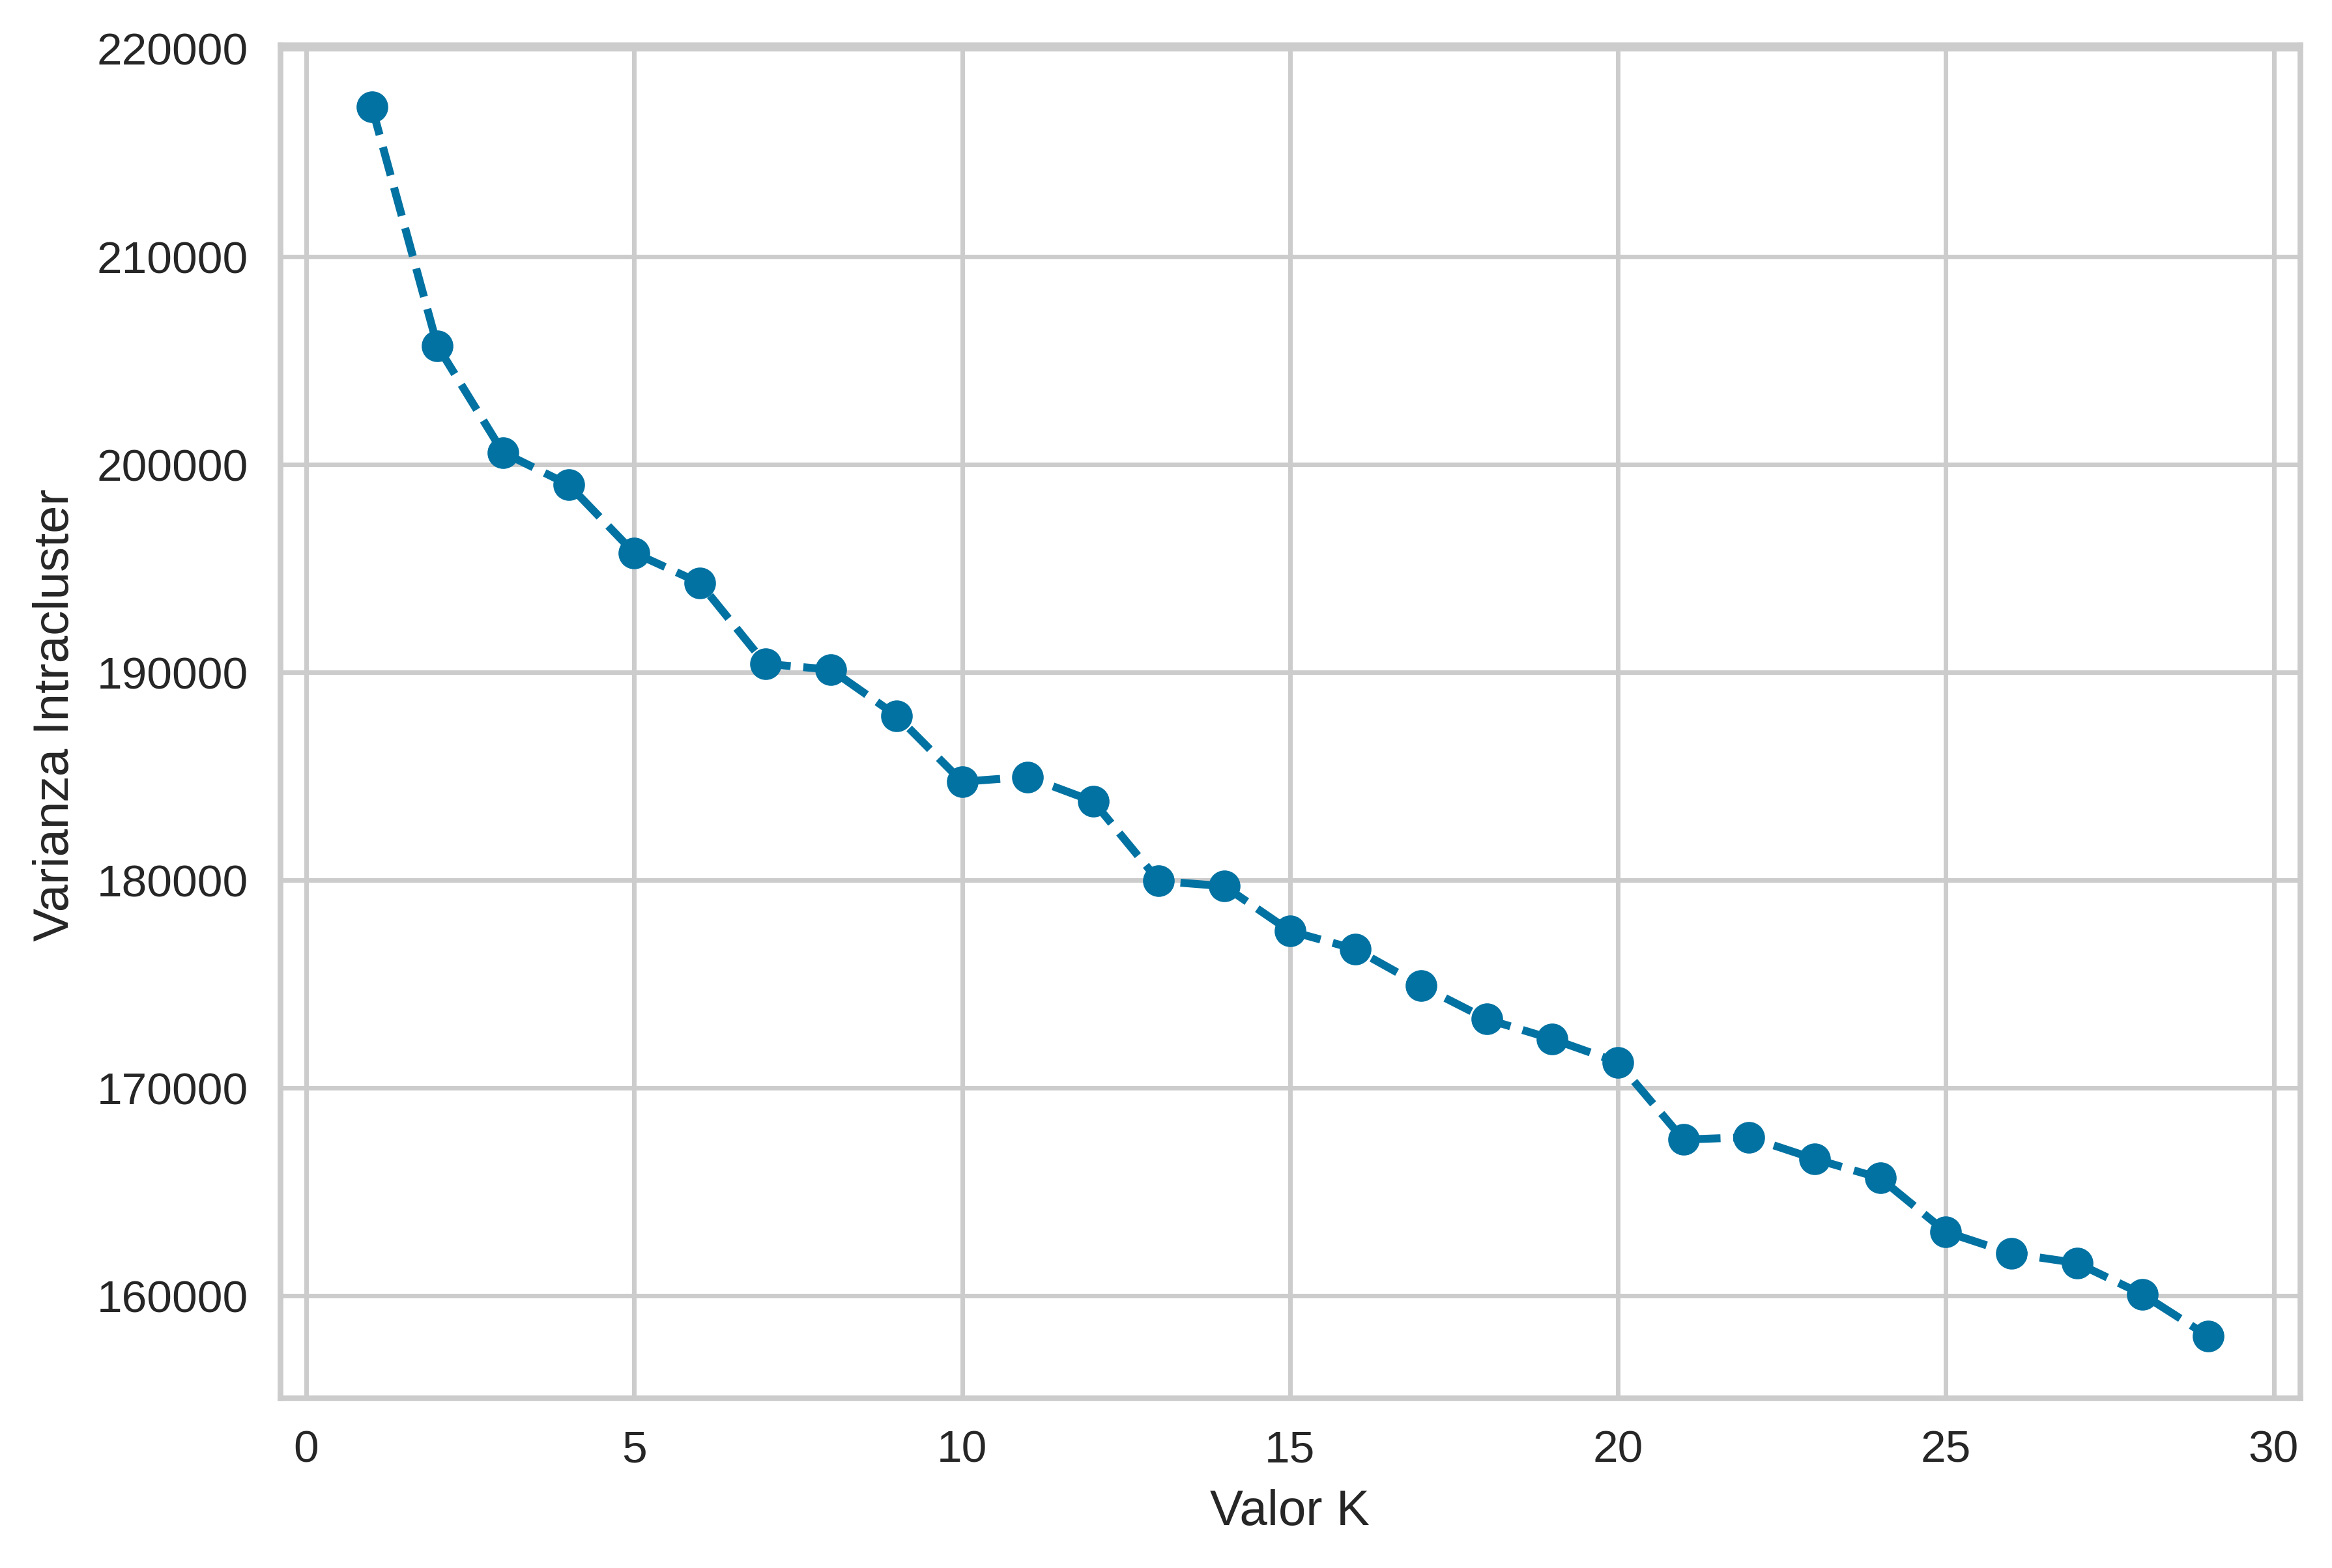

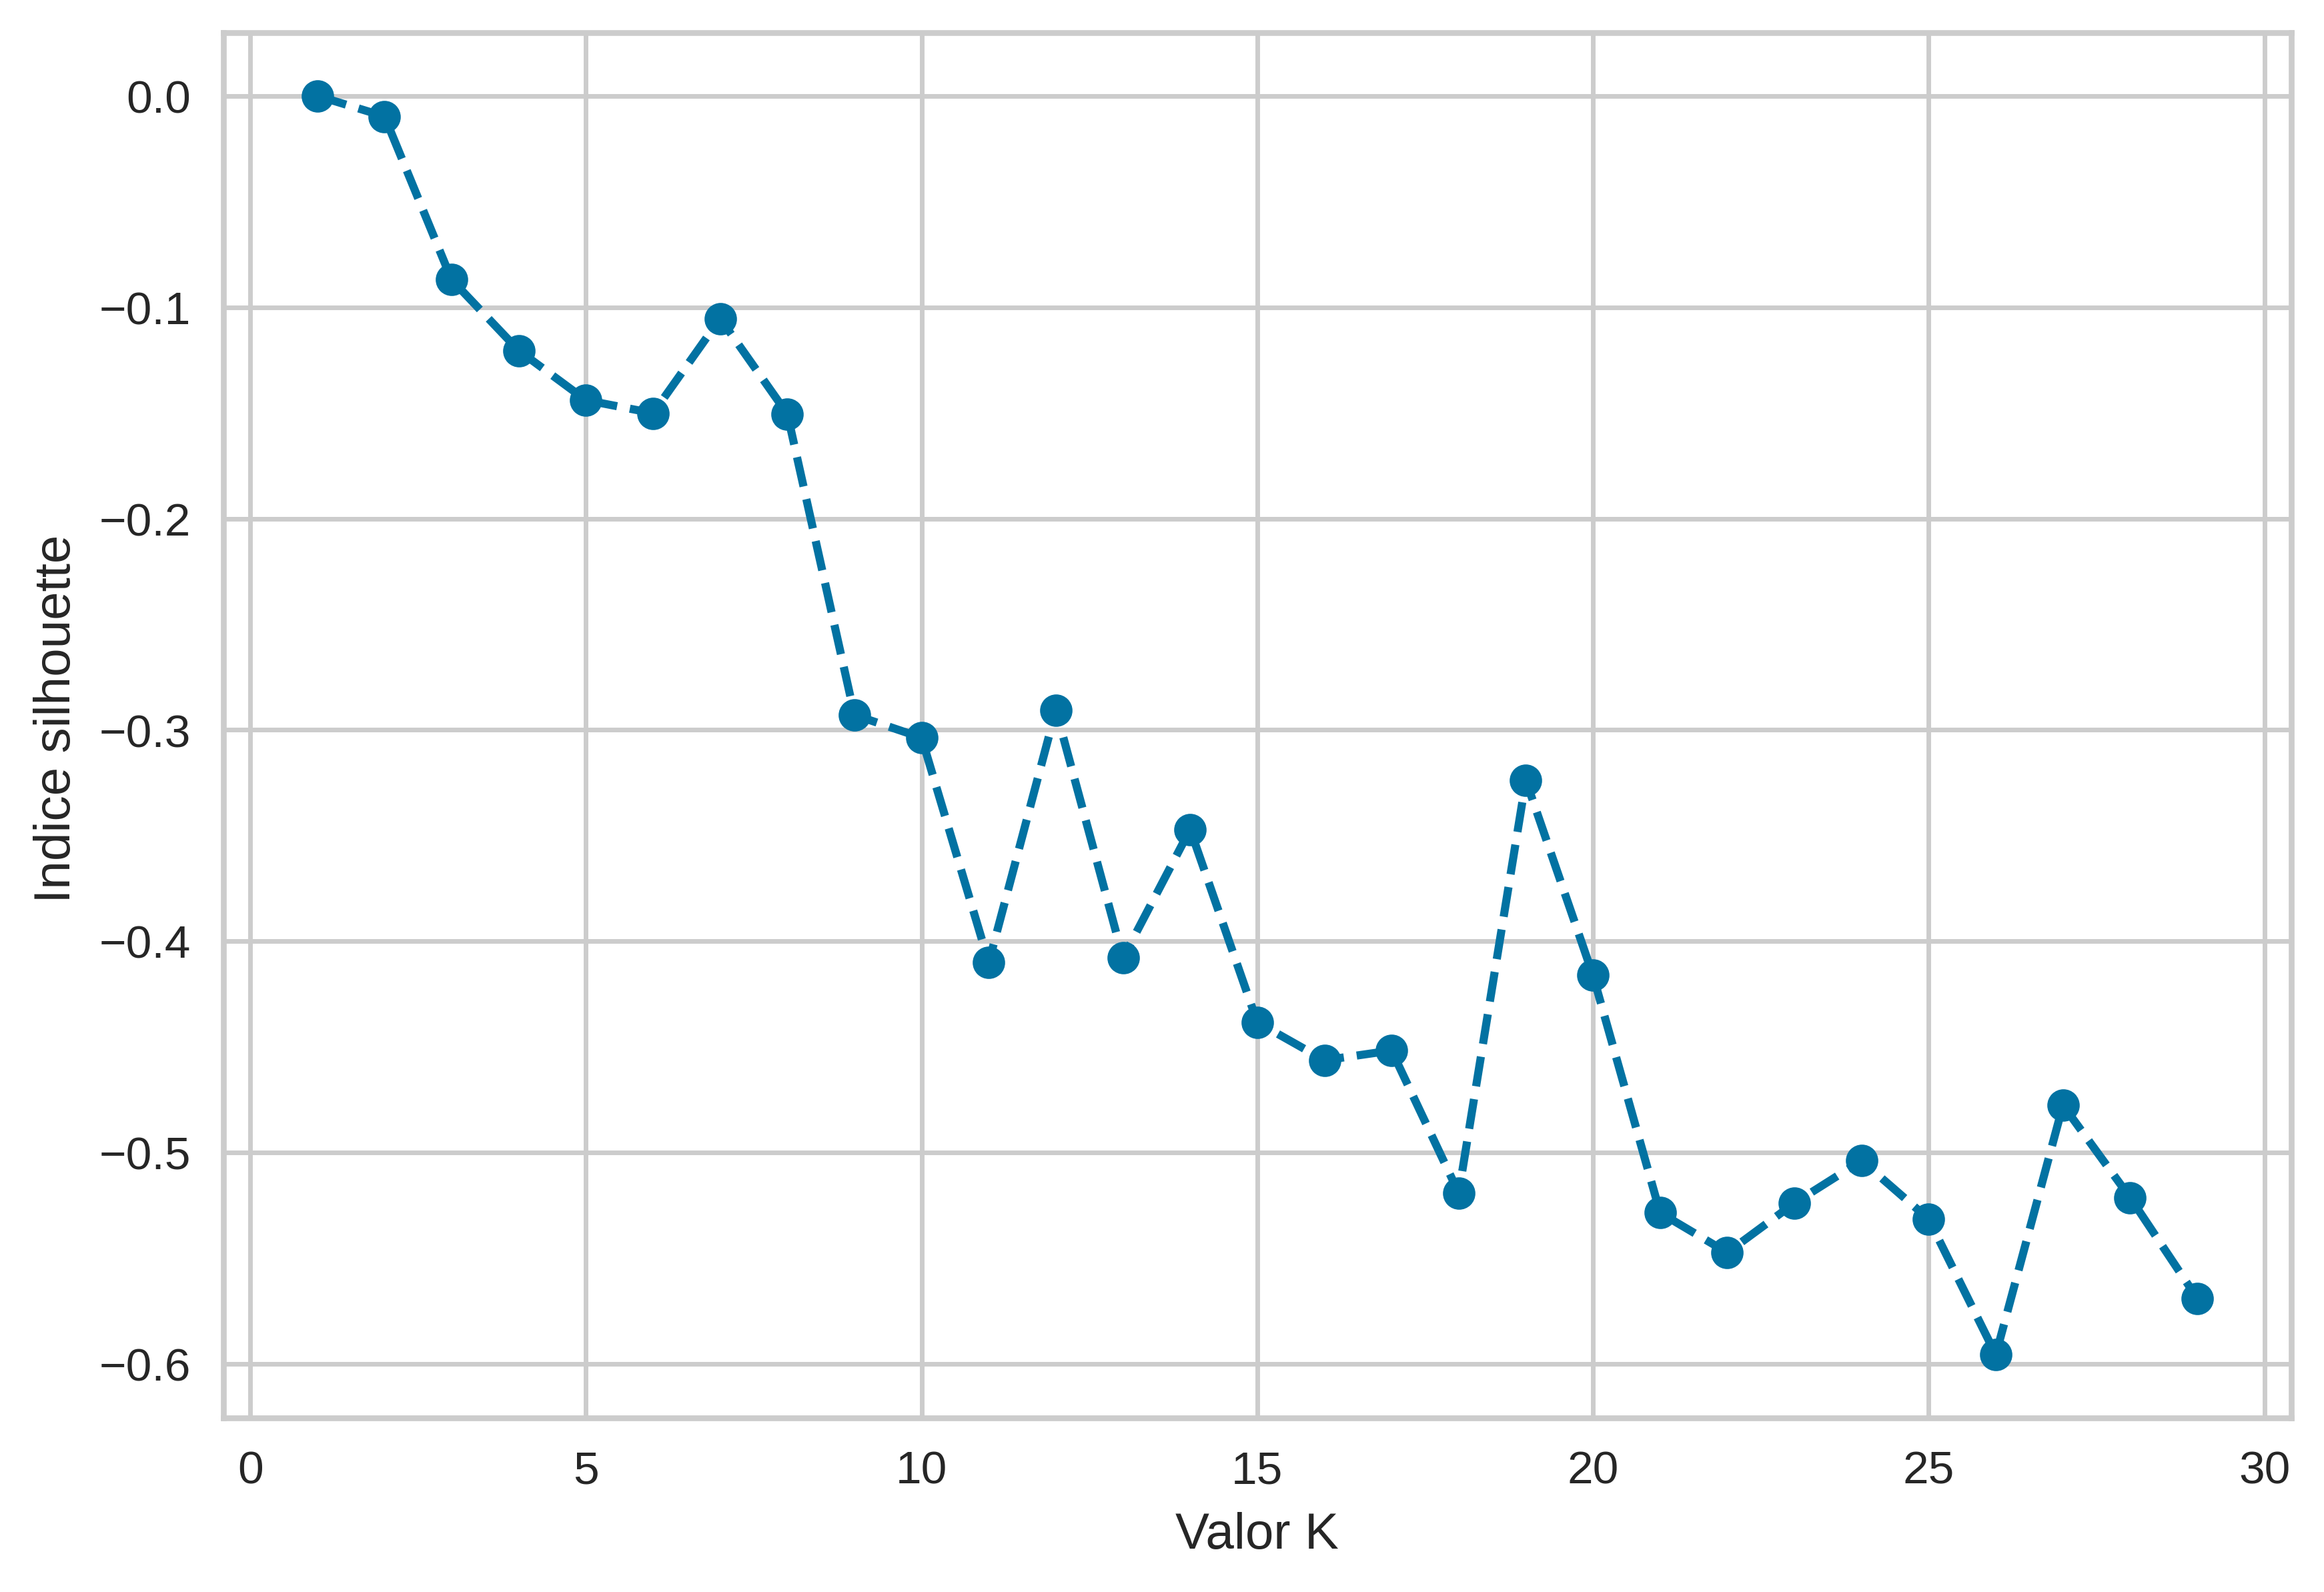

In [41]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X= circuitos.loc[:, ~circuitos.columns.isin( ['Substation Name','Transformer','MV Feeder Code','Feeder Name MV'])]
X = pd.get_dummies(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

varianza_intra_cluster = []
silhouettes = []
rango=range(1,30)
for k in rango :
    
    model = KMeans(n_clusters=k)
    model.fit(X_escalado)
    
    #Suma de distancias al cuadrado de las observaciones al centro de su closter. varianza intracluster
    varianza_intra_cluster.append(model.inertia_)
    try:
        silhouette = silhouette_score(X, model.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
plt.plot(rango,varianza_intra_cluster,'o--')
plt.xlabel("Valor K")
plt.ylabel(" Varianza Intracluster")
plt.savefig('Varianza Intracluster.png', format='png', dpi=300)
plt.show()

plt.plot(rango,silhouettes,'o--')
plt.xlabel("Valor K")
plt.ylabel(" Indice silhouette")
plt.savefig('Indice silhouette.png', format='png', dpi=300)
plt.show()

Indice siloutte nos indica que no hay clusters claramente distinguibles (la distancia intracluster es mas grande que la ditancia intercluster)

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(25,20))

axli = ax.flatten()

j = 0
 
for i in [ 7, 14, 19, 21]:
   
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax= axli[j] )
    visualizer.fit(X_escalado)
    visualizer.finalize()

    j+=1

plt.savefig('Visulizacoin Diagramas silhouette.png', format='png', dpi=300)

No veo clusters densamente proporcionados/